# Discovery of Handwashing
Today, we are going to look at the dataset on the number of births and maternal deaths at the Vienna General Hospital in the 1840s.

Table of contents:
* [Data Cleaning](#data-cleaning)
* [Data Exploration](#data-exploration)
* [Visualize The Data](#visualize-data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

## Data Cleaning <a id='data-cleaning'></a>

In [2]:
df_yearly_deaths = pd.read_csv('./data/annual_deaths_by_clinic.csv')
df_monthly_deaths = pd.read_csv('./data/monthly_deaths.csv', parse_dates=['date'])
print(f'Shape of df_monthly_deaths: {df_monthly_deaths.shape}\nShape of df_yearly_deaths: {df_yearly_deaths.shape}')

Shape of df_monthly_deaths: (98, 3)
Shape of df_yearly_deaths: (12, 4)


In [3]:
df_monthly_deaths.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [4]:
df_yearly_deaths

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [5]:
df_monthly_deaths.isna().any()

date      False
births    False
deaths    False
dtype: bool

In [6]:
df_monthly_deaths.duplicated(subset=['date']).any()

False

In [7]:
df_monthly_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [8]:
df_yearly_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


Pretty short and simple datasets. Now let's take a closer look and answer some related questions?

## Data Exploration <a id='data-exploration'></a>

What were the average number of births that took place per month?

In [9]:
df_monthly_deaths.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


We can see that there were about 267 births and 22,47 deaths per month.

What were the average number of births that took place per year?

In [10]:
df_yearly_deaths.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


On average, there were roughly 3153 births and 223 deaths.

Now, let's calculate the percentage of women who died giving birth.

In [11]:
df_yearly_deaths['death_percentage'] = df_yearly_deaths['deaths'] / df_yearly_deaths['births'] * 100
df_yearly_deaths

,year,births,deaths,clinic,death_percentage
0,1841,3036,237,clinic 1,7.806324
1,1842,3287,518,clinic 1,15.759051
2,1843,3060,274,clinic 1,8.954248
3,1844,3157,260,clinic 1,8.235667
4,1845,3492,241,clinic 1,6.901489
5,1846,4010,459,clinic 1,11.446384
6,1841,2442,86,clinic 2,3.521704
7,1842,2659,202,clinic 2,7.596841
8,1843,2739,164,clinic 2,5.987587
9,1844,2956,68,clinic 2,2.300406


## Visualize The Data <a id='visualize-data'></a>

Visualizing number of births and deaths monthly:

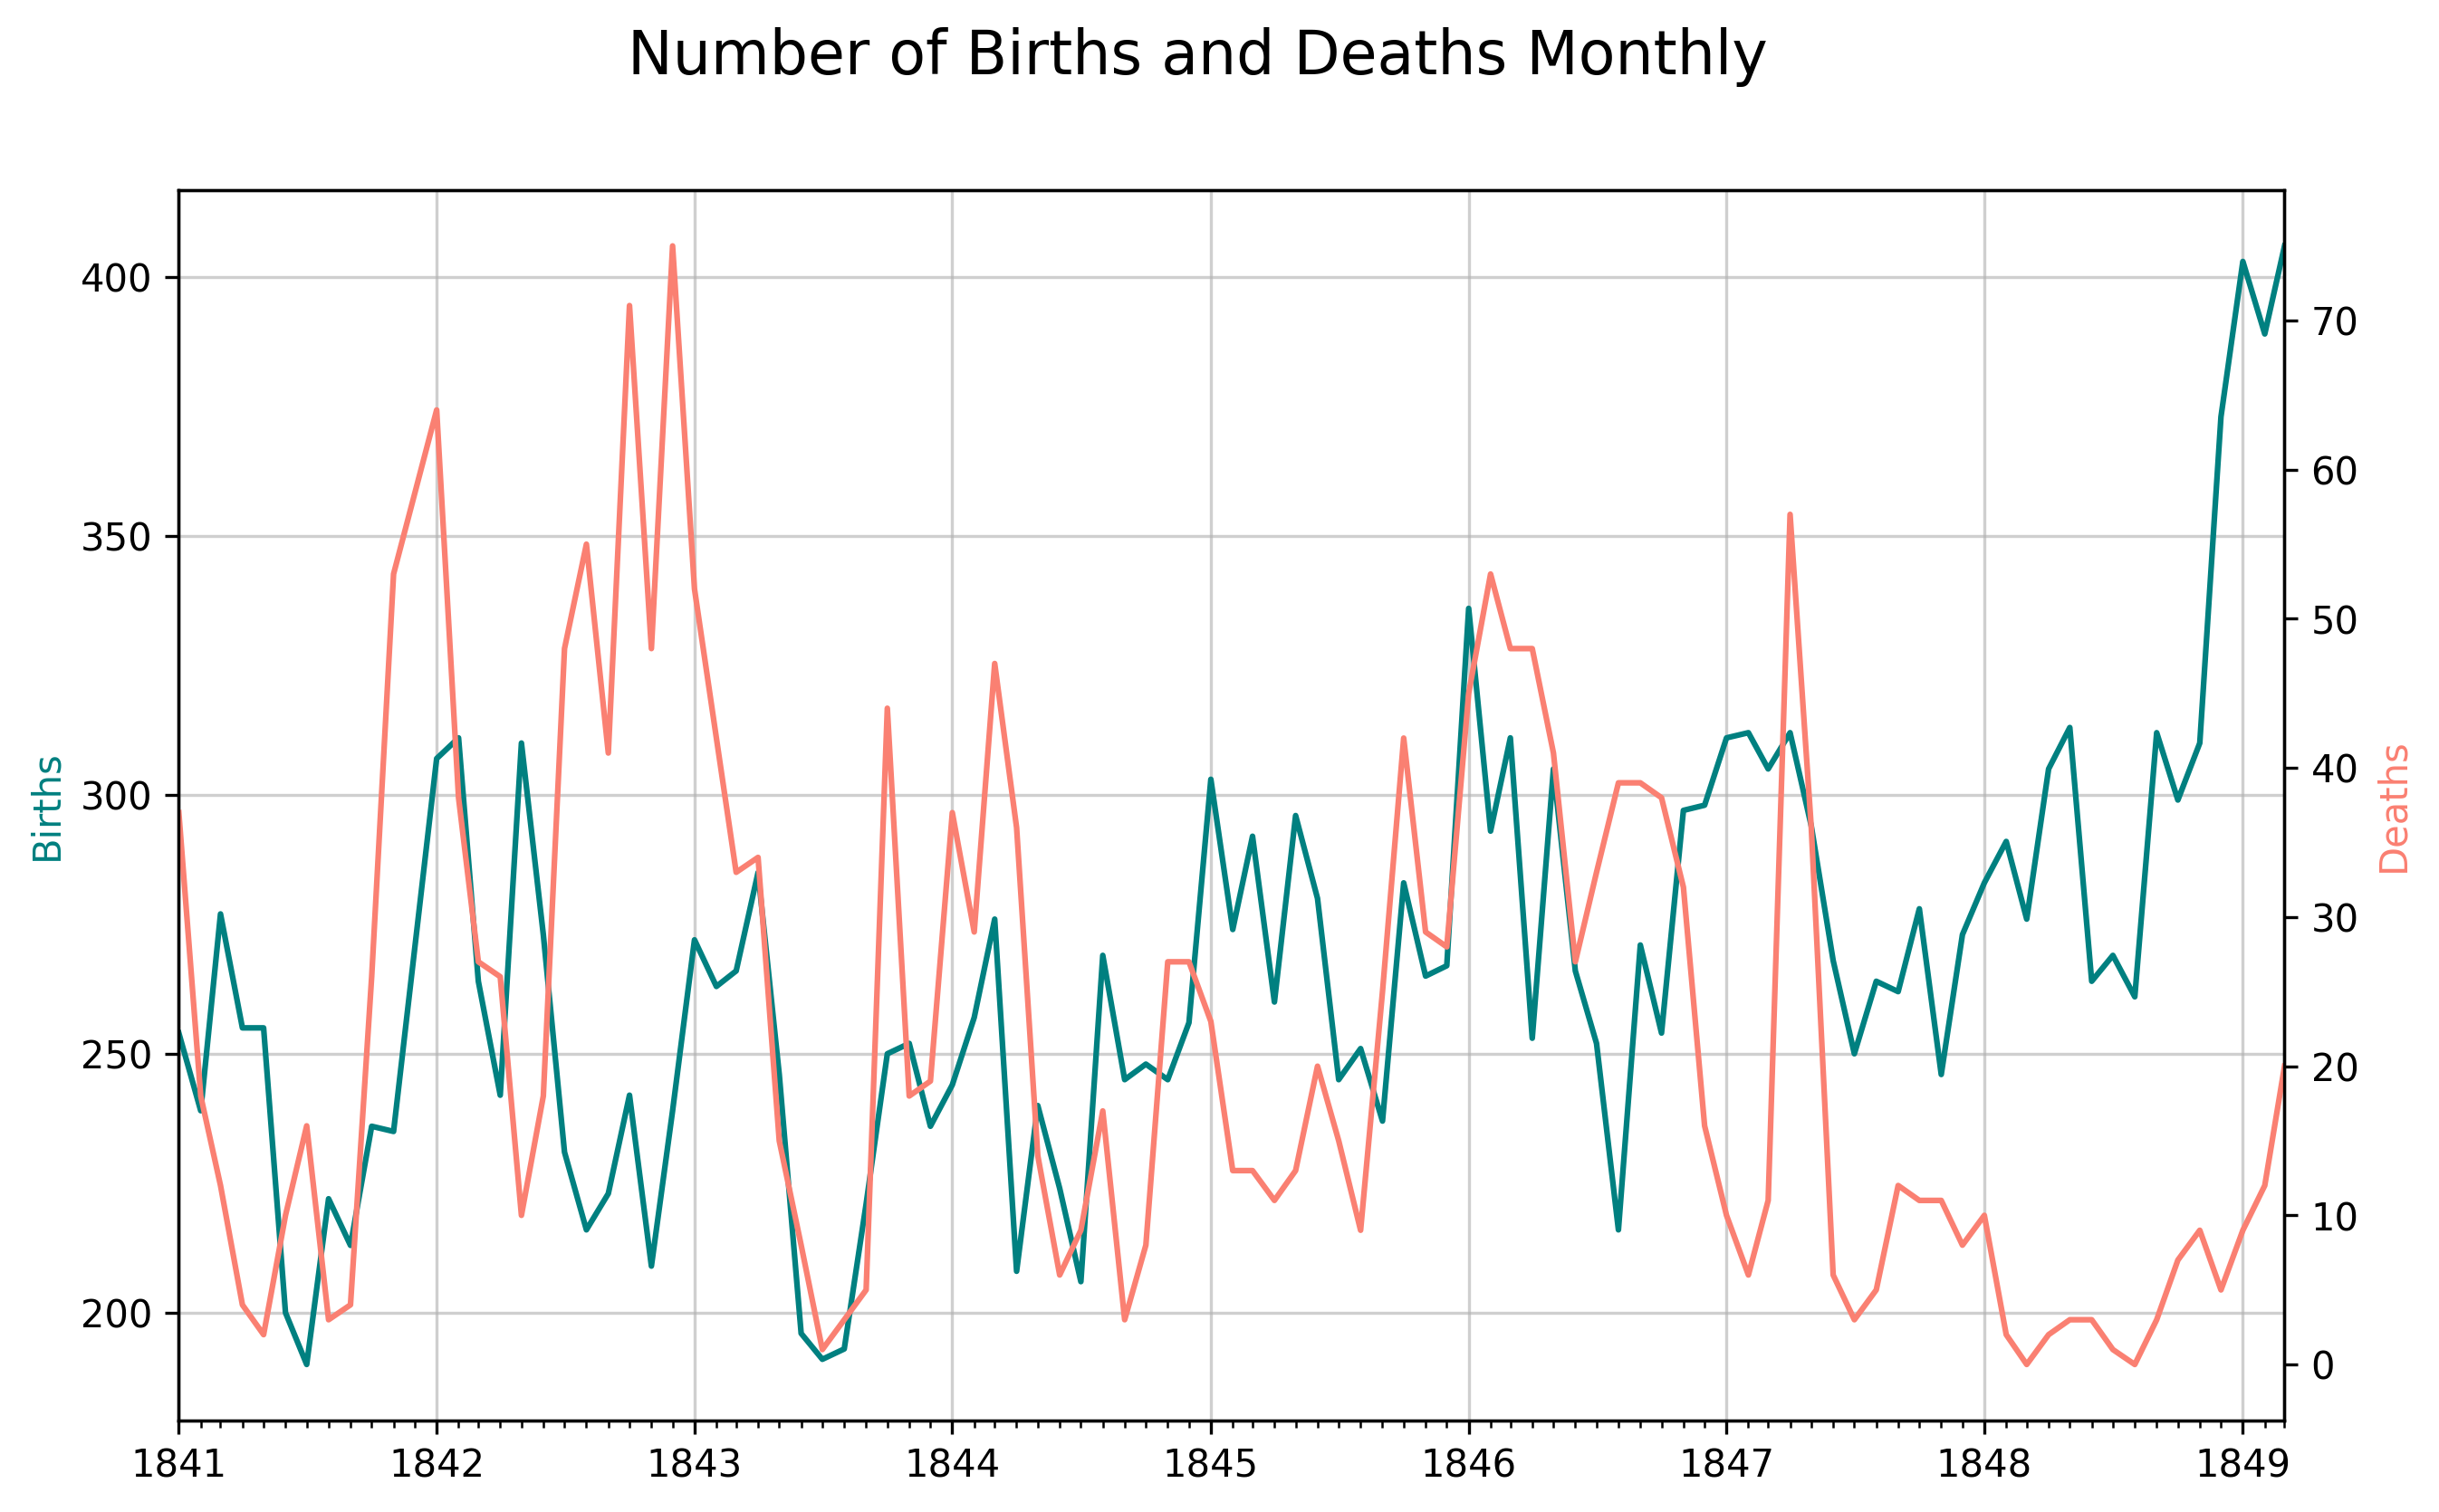

In [12]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
fig.suptitle('Number of Births and Deaths Monthly', fontsize=16)

years = mdates.YearLocator()
months = mdates.MonthLocator()
year_formatter = mdates.DateFormatter('%Y')

# plotting number of births
ax.plot('date', 'births', data=df_monthly_deaths, label='Births', c='teal')
ax.set_ylabel('Births', c='teal')
ax.set_xlim(left=df_monthly_deaths['date'].min(), right=df_monthly_deaths['date'].max())
ax.grid(visible=True, alpha=0.6)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_formatter)
ax.xaxis.set_minor_locator(months)

# plotting number of deaths
ax2 = ax.twinx()
ax2.plot('date', 'deaths', data=df_monthly_deaths, label='Deaths', c='salmon')
ax2.set_ylabel('Deaths', c='salmon')

plt.show()

From the above plot, we can see after the first few months of 1847, the number of deaths decreased despite the increasing number of births.

Now let's turn our attention to the yearly data. Let's use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.

In [13]:
fig = px.line(data_frame=df_yearly_deaths,
              x='year',
              y='births',
              color='clinic',
              markers=True,
              labels={'clinic': 'Clinic #',
                      'year': 'Year',
                      'births': 'Total Birth'},
              title='Total Births of Each Clinic from 1841 to 1846')
fig.show()


Total number of maternal deaths of each clinic

In [14]:
fig = px.line(data_frame=df_yearly_deaths,
              x='year',
              y='deaths',
              color='clinic',
              markers=True,
              labels={'year': 'Year',
                      'deaths': 'Total Deaths',
                      'clinic': 'Clinic #'},
              title='Total Maternal Deaths of Each Clinic from 1841 to 1846')
fig.show()


Overall, more people were born from clinic 1, but also more people died in clinic 1. Noticeably in 1842, there is a spike in the number of deaths for clinic 1 accounted for by 518 deaths in a total 3287 births. Meanwhile, clinic 2 seems to be more successful reducing the number of deaths from 1842 onwards. More and more women decided to give birth at clinic 2, hence the gradual increasing number of births.

Arguably, from 1845 to 1846, despite rising number of deaths from 241 deaths to 459 deaths for clinic 1, there were still women gave birth there.

Now we move on to calculate the annual death rate (total number of deaths / total number of births) of each clinic.

In [15]:
fig = px.line(data_frame=df_yearly_deaths,
              x='year',
              y='death_percentage',
              color='clinic',
              markers=True,
              title='Annual Death Rate of Each Clinic',
              labels={
                  'year': 'Year',
                  'death_percentage': 'Death Rate * 100',
                  'clinic': 'Clinic #',
              })
fig.show()


Again, clinic 1 had more deaths than clinic 2. Especially in 1842, clinic 1 accounted for 15,8% women who died, and 7.6% for clinic 2. 1842 looks like a rough year.